In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
company = pd.read_csv('Company_Data.csv')
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [3]:
company['Sales'].value_counts()

7.80    4
8.77    3
9.32    3
4.10    3
6.20    3
       ..
3.67    1
7.62    1
9.54    1
8.41    1
9.71    1
Name: Sales, Length: 336, dtype: int64

In [4]:
label_encoder = preprocessing.LabelEncoder()
company['Sales1']=label_encoder.fit_transform(company['Sales'])

In [5]:
company['Sales']

0       9.50
1      11.22
2      10.06
3       7.40
4       4.15
       ...  
395    12.57
396     6.14
397     7.41
398     5.94
399     9.71
Name: Sales, Length: 400, dtype: float64

In [7]:
company['Sales1']

0      255
1      297
2      267
3      158
4       37
      ... 
395    320
396    114
397    159
398    106
399    262
Name: Sales1, Length: 400, dtype: int64

In [8]:
company['Sales1'].value_counts()

183    4
223    3
243    3
34     3
117    3
      ..
28     1
172    1
257    1
205    1
262    1
Name: Sales1, Length: 336, dtype: int64

In [9]:
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales1
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,255
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,297
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,267
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,158
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,37
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,320
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,114
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,159
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,106


In [10]:
x = company.iloc[:,0:4]
y = company['Sales1']

In [11]:
colnames = list(company.columns)
colnames

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'ShelveLoc',
 'Age',
 'Education',
 'Urban',
 'US',
 'Sales1']

In [14]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=40)

In [15]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(320, 4) (80, 4) (320,) (80,)


Building Decision Tree Classifier using ENTROPY

In [16]:
model = DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

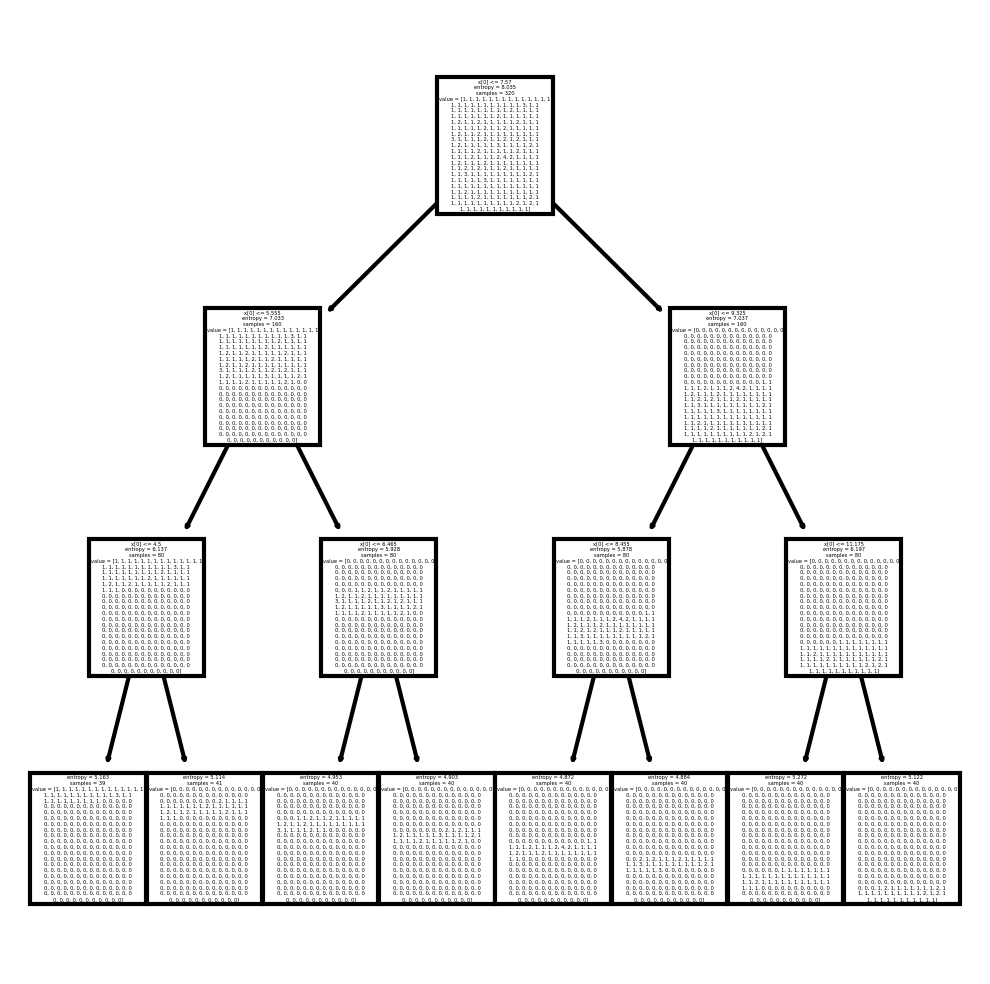

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model);

In [18]:
preds = model.predict(x_test)
pd.Series(preds).value_counts()

142    18
34     15
273    12
49     11
296     7
183     7
223     6
117     4
dtype: int64

In [19]:
preds

array([273,  49, 273, 142,  49,  34, 273, 273, 223, 296,  49,  49, 142,
       142, 273,  34, 117, 183,  49,  49, 273, 273, 273, 223,  34,  49,
       183,  34, 296, 296, 296, 142, 296, 142,  34, 296, 223, 142, 117,
       142, 142,  34,  34, 223,  49, 142, 183, 142, 142, 142,  34, 183,
       273, 142,  49, 273, 273, 142,  34,  34,  34,  34, 296, 142,  34,
       183, 142,  34, 117, 273, 183, 223, 142, 142, 183, 223,  34, 117,
        49,  49])

In [20]:
pd.crosstab(y_test,preds) 

col_0,34,49,117,142,183,223,273,296
Sales1,,,,,,,,
1,1,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0
11,1,0,0,0,0,0,0,0
15,1,0,0,0,0,0,0,0
23,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
305,0,0,0,0,0,0,0,1
307,0,0,0,0,0,0,0,1
325,0,0,0,0,0,0,0,1


In [21]:
np.mean(preds==y_test)

0.0

# Building Decision Tree using Gini

In [22]:
from sklearn.tree import DecisionTreeClassifier
model_gini = DecisionTreeClassifier(criterion='gini', max_depth=3)

In [23]:
model_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [24]:
preds=model_gini.predict(x_test)
np.mean(preds==y_test)

0.0

# Decision Tree Regression

In [25]:
from sklearn.tree import DecisionTreeRegressor

In [26]:
array = company.values
array
X = array[:,0:3]
Y = array[:,3]

In [27]:
X

array([[9.5, 138, 73],
       [11.22, 111, 48],
       [10.06, 113, 35],
       ...,
       [7.41, 162, 26],
       [5.94, 100, 79],
       [9.71, 134, 37]], dtype=object)

In [28]:
Y

array([11, 16, 10, 4, 3, 13, 0, 15, 0, 0, 9, 4, 2, 11, 11, 5, 0, 13, 0,
       16, 2, 12, 6, 0, 16, 0, 11, 0, 0, 15, 0, 16, 12, 13, 0, 11, 0, 5,
       0, 0, 0, 0, 0, 11, 6, 0, 14, 0, 0, 0, 18, 0, 3, 13, 13, 5, 0, 0,
       15, 4, 19, 0, 0, 10, 12, 0, 0, 14, 20, 0, 15, 16, 0, 10, 5, 23, 10,
       12, 1, 0, 16, 0, 4, 7, 0, 0, 9, 7, 7, 3, 0, 11, 0, 0, 5, 10, 10, 5,
       24, 3, 11, 0, 0, 0, 0, 8, 0, 0, 2, 0, 7, 12, 5, 11, 9, 0, 0, 0, 2,
       8, 11, 10, 5, 0, 0, 0, 2, 3, 3, 7, 13, 3, 9, 2, 0, 14, 0, 0, 12,
       10, 10, 0, 0, 7, 0, 11, 0, 9, 0, 13, 8, 17, 0, 7, 10, 0, 0, 8, 1,
       0, 0, 5, 0, 0, 0, 7, 17, 0, 0, 15, 12, 12, 13, 5, 0, 0, 9, 0, 14,
       3, 15, 0, 4, 6, 7, 11, 0, 0, 0, 18, 13, 13, 0, 7, 18, 4, 6, 0, 5,
       5, 0, 0, 4, 0, 0, 1, 0, 0, 0, 11, 2, 14, 19, 5, 3, 15, 0, 0, 12,
       19, 15, 0, 6, 9, 0, 0, 0, 10, 13, 0, 0, 0, 10, 18, 11, 8, 16, 8, 0,
       0, 0, 0, 0, 13, 0, 0, 20, 0, 0, 0, 10, 5, 0, 5, 23, 8, 0, 14, 0,
       10, 8, 4, 15, 6, 5, 10, 12, 7, 0, 0, 0, 0,

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30, random_state=1)

In [30]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(280, 3)
(120, 3)
(280,)
(120,)


In [31]:
model = DecisionTreeRegressor(criterion='squared_error')
model.fit(X_train, Y_train)

DecisionTreeRegressor()

In [32]:
model.score(X_train, Y_train)

1.0

In [33]:
model.score(X_test,Y_test)

-1.1660741072865992